# 实验三：参数估计 & 非参数估计
- 姓名：
- 学号：
- 专业：

## 实验要求

#### 1. 基本要求

（1） 在两个数据集合上分别应用“似然率测试规则” 、“最大后验概率规则” 进行分类实验，计算分类错误率，分析实验结果。

（2） 在两个数据集合上分别应用 $h=1$ 时的方窗核函数或高斯核函数估计方法，应用“似然率测试规则”进行分类实验，计算分类错误率，分析实验结果。


#### 2. 中级要求

根据初级要求中使用的一个核函数，在数据集 $X_2$上应用交叉验证法，在 $h \in [0.1, 0.5, 1, 1.5, 2] $ 中寻找最优的h值。


#### 3. 高级要求

任选一个数据集，在该数据集上应用k-近邻概率密度估计，任选3个k值输出概率密度分布图。


**截止日期：11月4日 实验课之前**
- 以.ipynb形式的文件提交，输出运行结果，并确保自己的代码能够正确运行
- 发送到邮箱：2120220594@mail.nankai.edu.cn

### 导入需要的包

In [1]:
import numpy as np
import sys
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 一. 基本要求

（1） 在两个数据集合上分别应用“似然率测试规则” 、“最大后验概率规则” 进行分类实验，计算分类错误率，分析实验结果。

（2） 在两个数据集合上分别应用 $h=1$ 时的方窗核函数或高斯核函数估计方法，应用“似然率测试规则”进行分类实验，计算分类错误率，分析实验结果。

### 1. 生成数据集 semesion

In [2]:
# 生成正态分布数据
def Generate_Sample_Gaussian(mean, cov, P, label):
    '''
        mean 为均值向量
        cov 为方差矩阵a
        P 为单个类的先验概率
        return 单个类的数据集
    '''
    temp_num = round(1200 * P)
    x, y = np.random.multivariate_normal(mean, cov, temp_num).T
    z = np.ones(temp_num) * label
    X = np.array([x, y, z])
    return X.T

In [3]:
def Generate_DataSet_plot(mean, cov, P):
    # 画出不同先验对应的散点图
    xx = []
    label = 1
    for i in range(3):
        xx.append(Generate_Sample_Gaussian(mean[i], cov, P[i], label))
        label += 1
        i = i + 1
    # 画图
    plt.figure()
    for i in range(3):
        plt.plot(xx[i][:, 0], xx[i][:, 1], '.', markersize=4.)
        plt.plot(mean[i][0], mean[i][1], 'r*')
    plt.show()
    return xx

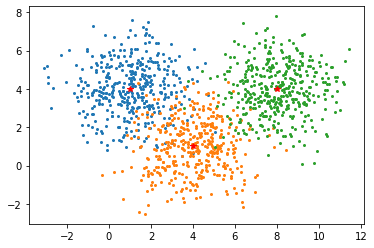

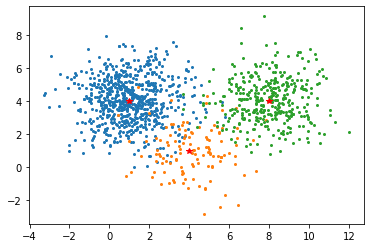

((1200, 3), (1200, 3))

In [4]:
# 根据mean，cov，P1,P2生成数据集X1,X2
mean = np.array([[1, 4], [4, 1], [8, 4]])  # 均值数组
cov = [[2, 0], [0, 2]]  # 方差矩阵
num = 1200  # 样本个数
P1 = [1 / 3, 1 / 3, 1 / 3]  # 样本X1的先验概率
P2 = [0.6, 0.1, 0.3]  # 样本X2的先验概率
X1 = np.array(Generate_DataSet_plot(mean, cov, P1), dtype=object)
X2 = np.array(Generate_DataSet_plot(mean, cov, P2), dtype=object)
X1 = np.vstack(X1)
X2 = np.vstack(X2)
X1.shape, X2.shape  # 前两列是坐标，最后一列是标签

In [5]:
# 按label进行数据集分类
X1_1=X1[np.where(X1[:,2]==1.0)]
X1_2=X1[np.where(X1[:,2]==2.0)]
X1_3=X1[np.where(X1[:,2]==3.0)]
X2_1=X2[np.where(X2[:,2]==1.0)]
X2_2=X2[np.where(X2[:,2]==2.0)]
X2_3=X2[np.where(X2[:,2]==3.0)]

### 2. 极大似然参数估计

In [6]:
# 极大似然估计
# 输入n*2维数据
def LikelyHood(X):
    mu = np.mean(X, axis=0)
    # python把向量转化成矩阵需要用reshape
    cov = np.array([np.dot((X[i] - mu).reshape(2,1), (X[i] - mu).reshape(1, 2)) for i in range(len(X))]).mean(axis=0)
    return mu, cov

In [7]:
# 利用极大似然估计进行参数估计
mu_1_1,cov_1_1=LikelyHood(X1_1[:,0:2])
mu_1_2,cov_1_2=LikelyHood(X1_2[:,0:2])
mu_1_3,cov_1_3=LikelyHood(X1_3[:,0:2])
mean_1=np.array([list(mu_1_1),list(mu_1_2),list(mu_1_3)]) 
cov_1=np.array([list(cov_1_1),list(cov_1_2),list(cov_1_3)])
print("X1数据集mu参数估计为：")
mean_1
print("X1数据集cov参数估计为(按不同label)：")
cov_1
mu_2_1,cov_2_1=LikelyHood(X2_1[:,0:2])
mu_2_2,cov_2_2=LikelyHood(X2_2[:,0:2])
mu_2_3,cov_2_3=LikelyHood(X2_3[:,0:2])
mean_2=np.array([list(mu_2_1),list(mu_2_2),list(mu_2_3)])
cov_2=np.array([list(cov_2_1),list(cov_2_2),list(cov_2_3)])
print("X2数据集mu参数估计为：")
mean_2
print("X2数据集cov参数估计为(按不同label)：")
cov_2

X1数据集mu参数估计为：


array([[1.01724551, 4.01945049],
       [3.98943023, 0.99301097],
       [8.00643649, 3.97092296]])

X1数据集cov参数估计为(按不同label)：


array([[[2.040147323259467, 0.018221544872951342],
        [0.018221544872951342, 1.9140095486721296]],

       [[2.0412164918076763, 0.10791556317303859],
        [0.10791556317303859, 1.8888687545255407]],

       [[1.8722826777064034, 0.05633724451241063],
        [0.05633724451241063, 1.8027143029844024]]], dtype=object)

X2数据集mu参数估计为：


array([[1.00885636, 4.04667971],
       [4.14809437, 0.97365226],
       [7.98075347, 4.0946907 ]])

X2数据集cov参数估计为(按不同label)：


array([[[ 1.92351638, -0.01178664],
        [-0.01178664,  1.92495208]],

       [[ 2.09432635, -0.06176844],
        [-0.06176844,  1.97209427]],

       [[ 1.93773558,  0.08660375],
        [ 0.08660375,  1.84806735]]])




### 3. 似然率测试规则 最大后验概率规则  高斯核函数估计

In [8]:
def Gaussian_function(x, mean, cov):
    det_cov = np.linalg.det(cov.tolist())  # 计算方差矩阵的行列式
    inv_cov = np.linalg.inv(cov.tolist())  # 计算方差矩阵的逆
    #计算概率p(x|w)
    p = 1/(2*np.pi*np.sqrt(det_cov))*np.exp(-0.5 * np.dot(np.dot((x - mean),inv_cov), (x - mean)))
    return p

In [9]:
# 高斯核概率密度函数计算
# 在公式中，x和mean应该是列向量，但是为了方便，这里接收的都是行向量（维度：1*2）
def Gaussian_Kernel(x, X, h=2):
    # 计算概率p(x|w)
    p = (1 / (np.sqrt(2 * np.pi) * h)) * np.array([np.exp(-0.5 * np.dot(x - X[i], x - X[i]) / (h**2)) for i in range(len(X))]).mean()
    return p

In [10]:
# 似然率测试规则
def Likelihood(X, mean, cov):
    class_num = mean.shape[0]  # 类的个数
    num = np.array(X).shape[0]
    wrong = 0
    for i in range(num):
        p_temp = np.zeros(3)
        for j in range(class_num):
            # 计算样本i决策到j类的概率
            p_temp[j] = Gaussian_function(X[i][0:2], mean[j], cov[j])  
        p_class = np.argmax(p_temp) + 1  # 得到样本i决策到的类
        if p_class != X[i][2]:
            wrong += 1
    return round(wrong / num , 3)

In [11]:
##最大后验概率规则
def Posterior(X, mean, cov, P):
    # 类的个数
    class_num = mean.shape[0]  
    num = np.array(X).shape[0]
    wrong = 0
    for i in range(num):
        p_temp = np.zeros(3)
        for j in range(class_num):
            # 计算样本i是j类的后验概率
            p_temp[j] =Gaussian_function(X[i][0:2],mean[j],cov[j])*P[j]
        p_class = np.argmax(p_temp) + 1  # 得到样本i分到的类
        if p_class != X[i][2]:
            wrong += 1
    return round(wrong / num,3)

In [12]:
# 高斯核函数+似然率测试规则
def Gaussian_Likelihood(X_total, X, mean, cov, h):
    class_num = mean.shape[0]  # 类的个数
    num = np.array(X_total).shape[0]
    wrong = 0
    for i in range(num):
        p_temp = np.zeros(3)
        for j in range(class_num):
            # 计算样本i决策到j类的概率
            p_temp[j] = Gaussian_Kernel(X_total[i][0:2], X[j][:,0:2], h)  
        p_class = np.argmax(p_temp) + 1  # 得到样本i决策到的类
        if p_class != X_total[i][2]:
            wrong += 1
    return round(wrong / num , 3)

In [13]:
[X1_1,X1_2,X1_3][0][:,0:2].shape

(400, 2)

In [14]:
# 单次试验求不同准则下的分类误差
# 通过不同规则得到不同分类错误率

h = 1
# 计算似然率测试规则误差
error_likelihood = Likelihood(X1, mean_1, cov_1)
error_likelihood_2 = Likelihood(X2, mean_2, cov_2)

# 计算最大后验概率规则误差
error_Max_Posterior_Rule = Posterior(X1, mean_1, cov_1, P1)
error_Max_Posterior_Rule_2 = Posterior(X2, mean_2, cov_2, P2)

error_Gaussian_Kernel_Rule = Gaussian_Likelihood(X1,[X1_1,X1_2,X1_3], mean_1, cov_1,  h)
error_Gaussian_Kernel_Rule_2 = Gaussian_Likelihood(X2,[X2_1,X2_2,X2_3], mean_2, cov_2, h)

#### 实验结果：

In [15]:
print("实验方法:    极大似然规则      最大后验规则   高斯核函数估计")
print("X1误差: \t{}   \t{}   \t{}".format(error_likelihood,error_Max_Posterior_Rule,error_Gaussian_Kernel_Rule))
print("X2误差: \t{}     \t{}   \t{}".format(error_likelihood_2, error_Max_Posterior_Rule_2,error_Gaussian_Kernel_Rule_2))

实验方法:    极大似然规则      最大后验规则   高斯核函数估计
X1误差: 	0.064   	0.064   	0.062
X2误差: 	0.058     	0.048   	0.059


## 二. 中级要求
根据初级要求中使用的一个核函数，在数据集 $X_2$上应用交叉验证法，在 $h \in [0.1, 0.5, 1, 1.5, 2] $ 中寻找最优的h值。

### 1. 采用留一法进行交叉验证

计算每个x属于该数据集各个label的概率并取argmax得到分类结果，与第一问（2）不同的是，此处采用留一法交叉验证，因此训练集设为为X-x

In [16]:
# 高斯核函数估计方法 + 似然率测试规则
def Gaussian_Likelihood_cross(X,P,h):
    class_num = X.shape[1]
    num = X.shape[0]
    wrong = 0
    # 对每一个样例进行分类
    for i in range(num):
        class_p = np.zeros(class_num)
        start=0
        for j in range(class_num):
            # 计算该样例属于第j类的概率
            if i>=start and i<start+round(num*P[j]):
                data = X[start:start+round(num*P[j]),:]
                data =np.delete(data,i-start,axis=0)
                class_p[j]=Gaussian_Kernel(X[i][0:2],data[:,0:2],h)
            else:
                class_p[j]=Gaussian_Kernel(X[i][0:2],X[start:start+round(num*P[j]),0:2],h)
            start+=round(num*P[j])
        start_class = np.argmax(class_p)+1
        if start_class!=X[i][2]:
            wrong+=1
    return round(wrong / num , 3)

### 2. 实验结果

[0.081, 0.062, 0.059, 0.059, 0.059]


<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'h')

Text(0, 0.5, 'loss')

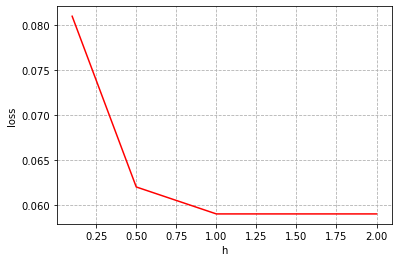

In [17]:
error_h=[] 
h_total = [0.1,0.5,1,1.5,2]
for h in h_total:
    error_h.append(Gaussian_Likelihood_cross(X2, P2, h))
print(error_h)
plt.figure()
plt.plot(h_total,error_h, 'r')
plt.grid(linestyle="--")
plt.xlabel("h")
plt.ylabel("loss")
# 显示图
plt.show()

### 探究一： 扩大h范围观察h与loss关系
根据题目要求对在 [0.1,0.5,1,1.5,2] 中寻找到最优的h值为2，但是并没有出现拐点，因此我扩大h范围进行搜索，设置h=[0.1,1,2,3,5,10]，可以观察到当h=5的时候loss值已经不在发生变化

[0.081, 0.062, 0.059, 0.059, 0.059, 0.058, 0.058]

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'h')

Text(0, 0.5, 'loss')

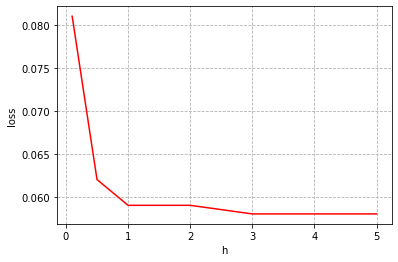

In [18]:
error_h=[]
h_total = [0.1,0.5,1,1.5,2,3,5]
for h in h_total:
    error_h.append(Gaussian_Likelihood_cross(X2, P2, h))
error_h
plt.figure()
plt.plot(h_total,error_h, 'r')
plt.grid(linestyle="--")
plt.xlabel("h")
plt.ylabel("loss")
# 显示图
plt.show()

### 探究二：不同数据集（不同参数估计）对最优h的影响
为了探究最优h与不同数据集之间的关系，下面进行了12组实验，每组实验重新生成新的数据集

In [19]:
# 绘制图像
def Res_plot(epochs,row_num,h_total,error_total):
    # 创建画布
    figure,axes=plt.subplots(nrows=int(epochs/row_num), ncols=row_num, figsize=(15,8),dpi=80)
    for i in range(epochs):
        x = int(math.floor(i/row_num))
        y = int(math.floor(i%row_num))
        axes[x][y].plot(h_total,error_total[i],color='r',linestyle='-')
        axes[x][y].grid(linestyle="--",alpha=0.5)
        axes[x][y].set_xlabel("h")
        axes[x][y].set_ylabel("loss")
        # 显示图
    plt.show()

第1个数据集h=[0.1,0.5,1,1.5,2]对应的loss为[0.091, 0.084, 0.081, 0.079, 0.079]
第2个数据集h=[0.1,0.5,1,1.5,2]对应的loss为[0.062, 0.067, 0.064, 0.061, 0.06]
第3个数据集h=[0.1,0.5,1,1.5,2]对应的loss为[0.073, 0.058, 0.059, 0.058, 0.059]
第4个数据集h=[0.1,0.5,1,1.5,2]对应的loss为[0.069, 0.057, 0.058, 0.058, 0.058]
第5个数据集h=[0.1,0.5,1,1.5,2]对应的loss为[0.064, 0.062, 0.059, 0.058, 0.058]
第6个数据集h=[0.1,0.5,1,1.5,2]对应的loss为[0.072, 0.066, 0.058, 0.058, 0.058]
第7个数据集h=[0.1,0.5,1,1.5,2]对应的loss为[0.066, 0.062, 0.065, 0.065, 0.066]
第8个数据集h=[0.1,0.5,1,1.5,2]对应的loss为[0.073, 0.062, 0.066, 0.068, 0.068]
第9个数据集h=[0.1,0.5,1,1.5,2]对应的loss为[0.069, 0.054, 0.058, 0.06, 0.062]
第10个数据集h=[0.1,0.5,1,1.5,2]对应的loss为[0.071, 0.058, 0.062, 0.062, 0.061]
第11个数据集h=[0.1,0.5,1,1.5,2]对应的loss为[0.072, 0.056, 0.06, 0.062, 0.063]
第12个数据集h=[0.1,0.5,1,1.5,2]对应的loss为[0.089, 0.074, 0.072, 0.074, 0.075]


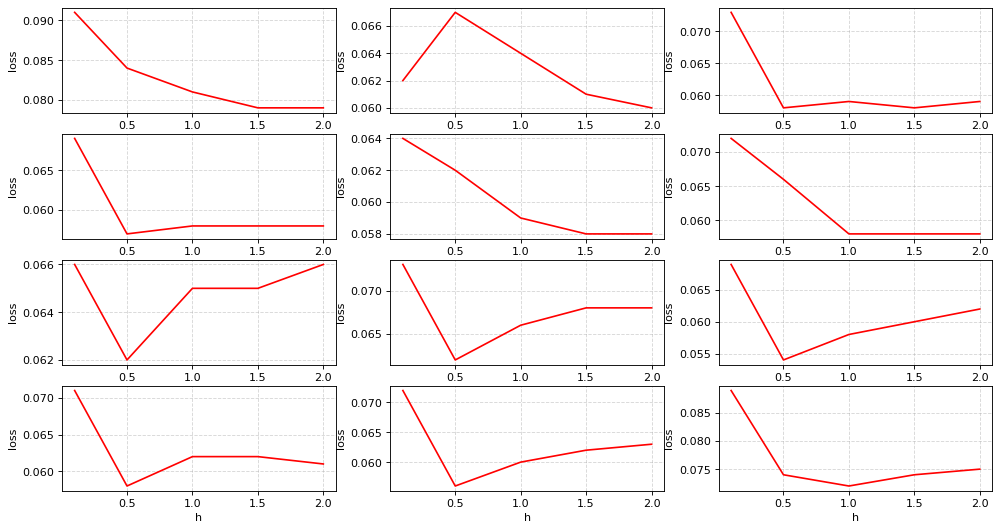

In [20]:
epochs = 12
row_num = 3
h_total = [0.1,0.5,1,1.5,2]
error_total=[]

# 进行12轮测试并绘制图像
for epoch in range(epochs):
    mean = np.array([[1, 4], [4, 1], [8, 4]])  # 均值数组
    cov = [[2, 0], [0, 2]]  # 方差矩阵
    num = 1200  # 样本个数
    P2 = [0.6, 0.1, 0.3]  # 样本X2的先验概率
    
    # 每次测试重新生成数据集
    X2 = []
    label = 1
    for i in range(3):
        X2.append(Generate_Sample_Gaussian(mean[i], cov, P2[i], label))
        label += 1
        i = i + 1
    X2 = np.vstack(X2)
    
    # 留一法进行交叉验证
    error_h=[]
    for h in h_total:
        error_h.append(Gaussian_Likelihood_cross(X2, P2, h))
    error_total.append(error_h)
    print("第{}个数据集h=[0.1,0.5,1,1.5,2]对应的loss为{}".format((epoch+1),error_h))
Res_plot(epochs,row_num,h_total,error_total)

## 三. 高级要求
任选一个数据集，在该数据集上应用k-近邻概率密度估计，任选3个k值输出概率密度分布图。

### 1. 概率密度函数
    （1）生成标准差距离
    （2）根据第k个数据点的位置计算V
    （3）找到前k个数据点的类别,分别加到对应类的权重上
    （4）计算每个采样点的概率密度函数

In [21]:
def Kneibor_Eval(X, k):
    num = len(X)
    # Xtrain = np.array(X)
    # 生成200*200=40000个采样点，每个采样点对应三类的不同概率
    p = np.zeros((200, 200, 3))
    # 在[-5,15]的范围内，以0.1为步长估计概率密度
    for i in np.arange(0, 200):
        for j in np.arange(0, 200):
            total = []
            x = -5 + 0.1 * i
            y = -5 + 0.1 * j
            for data in X:
                # 生成标准差距离
                temp = []
                temp = list(data)
                dis = math.sqrt((x - data[0]) ** 2 + (y - data[1]) ** 2)
                temp.append(dis)
                total.append(temp)
            total = np.array(total)
             # 按最后一列排序
            total_sort = total[np.lexsort(total.T)]
            
            # 根据第k个数据点的位置计算S
            total_choose = total_sort[:k, :]
            S = math.pi * (total_choose[k - 1][3]**2)
            
            # 找到前k个数据点的类别,分别加到对应类的权重上
            num1 = sum(total_choose[:,2]==1.0)
            num2 = sum(total_choose[:,2]==2.0)
            num3 = sum(total_choose[:,2]==3.0)
            
            # 计算每个采样点的概率密度函数
            res = []
            res.append(num1 / (S * 1200))
            res.append(num2 / (S * 1200))
            res.append(num3 / (S * 1200))
            p[i][j]=res
    return p

### 2. 选取K = 10并输出概率密度分布图

Text(0.5, 0.92, 'sample:X1, k=10, label:0')

Text(0.5, 0, 'X')

Text(0.5, 0.5, 'Y')

Text(0.5, 0.92, 'sample:X1, k=10, label:1')

Text(0.5, 0, 'X')

Text(0.5, 0.5, 'Y')

Text(0.5, 0.92, 'sample:X1, k=10, label:2')

Text(0.5, 0, 'X')

Text(0.5, 0.5, 'Y')

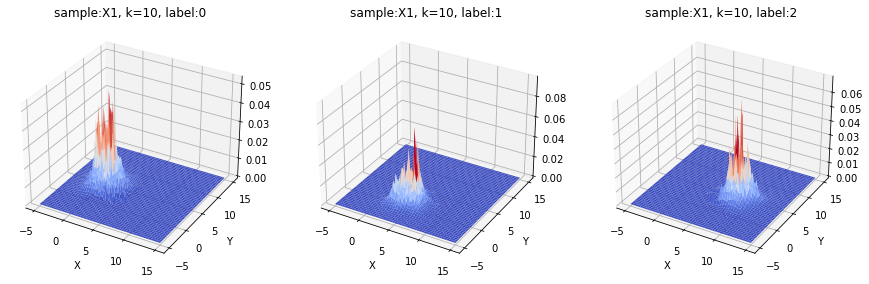

In [22]:
p = Kneibor_Eval(X1, 10)  # 获得概率密度估计

X,Y = np.mgrid[-5:15:200j, -5:15:200j]
Z0 = p[:, :, 0]
Z1 = p[:, :, 1]
Z2 = p[:, :, 2]
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(1, 3, 1,projection='3d')
ax.plot_surface(X, Y, Z0,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=10, label:0")
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax = plt.subplot(1, 3, 2,projection='3d')
ax.plot_surface(X, Y, Z1,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=10, label:1")
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax = plt.subplot(1, 3, 3,projection='3d')
ax.plot_surface(X, Y, Z2,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=10, label:2")
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

### 3. 选取K = 20并输出概率密度分布图

Text(0.5, 0.92, 'sample:X1, k=20, label:0')

Text(0.5, 0, 'X')

Text(0.5, 0.5, 'Y')

Text(0.5, 0.92, 'sample:X1, k=20, label:1')

Text(0.5, 0, 'X')

Text(0.5, 0.5, 'Y')

Text(0.5, 0.92, 'sample:X1, k=20, label:2')

Text(0.5, 0, 'X')

Text(0.5, 0.5, 'Y')

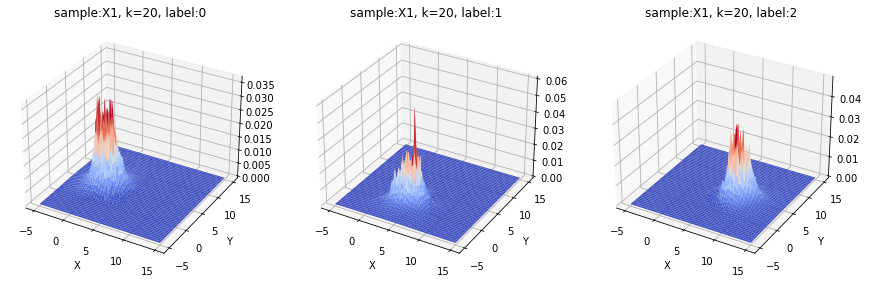

In [23]:
p = Kneibor_Eval(X1, 20)  # 获得概率密度估计

X,Y = np.mgrid[-5:15:200j, -5:15:200j]
Z0 = p[:, :, 0]
Z1 = p[:, :, 1]
Z2 = p[:, :, 2]

fig = plt.figure(figsize=(15,5))
ax = plt.subplot(1, 3, 1,projection='3d')
ax.plot_surface(X, Y, Z0,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=20, label:0")
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax = plt.subplot(1, 3, 2,projection='3d')
ax.plot_surface(X, Y, Z1,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=20, label:1")
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax = plt.subplot(1, 3, 3,projection='3d')
ax.plot_surface(X, Y, Z2,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=20, label:2")
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

### 4. 选取K = 30并输出概率密度分布图

Text(0.5, 0.92, 'sample:X1, k=30, label:0')

Text(0.5, 0, 'X')

Text(0.5, 0.5, 'Y')

Text(0.5, 0.92, 'sample:X1, k=30, label:1')

Text(0.5, 0, 'X')

Text(0.5, 0.5, 'Y')

Text(0.5, 0.92, 'sample:X1, k=30, label:2')

Text(0.5, 0, 'X')

Text(0.5, 0.5, 'Y')

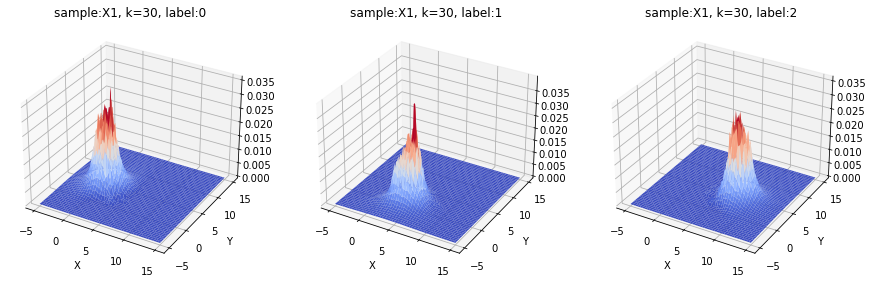

In [24]:
p = Kneibor_Eval(X1, 30)  # 获得概率密度估计

X,Y = np.mgrid[-5:15:200j, -5:15:200j]
Z0 = p[:, :, 0]
Z1 = p[:, :, 1]
Z2 = p[:, :, 2]

fig = plt.figure(figsize=(15,5))
ax = plt.subplot(1, 3, 1,projection='3d')
ax.plot_surface(X, Y, Z0,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=30, label:0")
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax = plt.subplot(1, 3, 2,projection='3d')
ax.plot_surface(X, Y, Z1,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=30, label:1")
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax = plt.subplot(1, 3, 3,projection='3d')
ax.plot_surface(X, Y, Z2,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=30, label:2")
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

## 四. 收获积累 or 坑点

 1. 按照最后一列排序一开始还自己写的，后来发现可以调用np.lexsort(total.T)一下子就完事了,但是需要注意np.lexsort得到的结果是下标，还需要total[np.lexsort(total.T)]
 2. 第二问采用留一法交叉验证的时候，需要判断该label数据中是否包含x，如果包含的话需要剔除
 3. 进行数据筛选的时候可以使用where，例如np.where(X1[:,2]==1.0)筛选出来X1数据集中label=1的所有数据，不用再写个遍历循环